# Mithilesh Yadav


# Task # 2 - To Explore Supervised Machine Learning
#### Problem Statement - To predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

#### What will be predicted score if a student study for 9.25 hrs in a day?

### Import all the important libaries.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

### Import our dataset from the URL.
##### Note : As we know our dataset is in csv file format we have so we have to use .read_csv() to read the file.

In [7]:
score = pd.read_csv("http://bit.ly/w-data")

### Dataset Overview

In [8]:
score.head()  # Gives the first five rows of dataset.

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Data Preprocessing

#### Check some import details about the dataset before moving ahead.
### Like null values, datatypes of each columns, sahpe.

In [10]:
score.columns

Index(['Hours', 'Scores'], dtype='object')

In [11]:
score.info(memory_usage=True)    # This function gives the summary of basic details of a dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [12]:
score.shape    # To Check the shape i.e numbers of rows and columns our dataset have.

(25, 2)

In [13]:
score.isnull().sum()   # To check how many null values or missing values each columns have.

Hours     0
Scores    0
dtype: int64

In [14]:
score.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


##### Since our dataset have no problem we can move to next step.

### Visualizing the Data.
##### Try to find relation between columns by ploting our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data

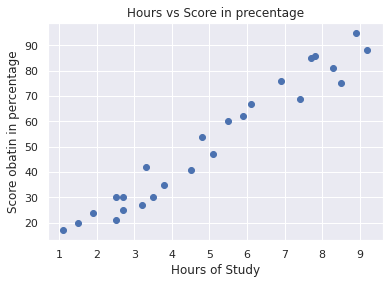

In [17]:
plt.scatter(score.Hours, score.Scores, c="b")
plt.xlabel("Hours of Study")
plt.ylabel("Score obatin in percentage")
plt.title("Hours vs Score in precentage")
plt.show()

#### Correlation In Variables

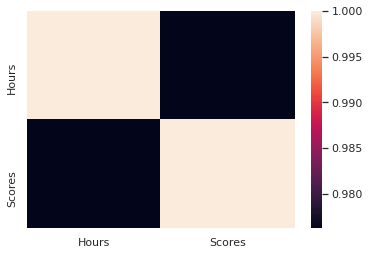

In [18]:

sns.heatmap(score.corr())

- By observing the correlation matrix we can say that hours and scores have positive correlation.

### Seperate the dataset into X (features) and y (response).

In [21]:
X = score.iloc[ : ,  : -1].values

y = score.loc[ : , "Scores"].values

### Divide the dataset into train and test.


In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

### Train the model.

In [27]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Prediction 1

In [29]:
y_pred = reg.predict(x_test)

In [30]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

### Visualizing the prediction.

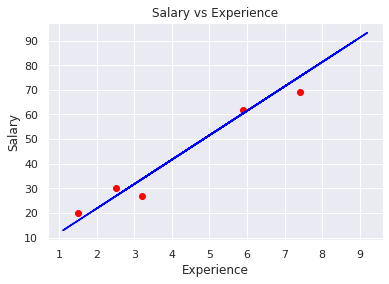

In [48]:
plt.scatter(x_test, y_test, color="red")
plt.plot(x_train, reg.predict(x_train), color="blue")
plt.title("Salary vs Experience")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

##### Comparing Actual and Predicted Values.

In [45]:
compare = pd.DataFrame(y_test, columns=["Actual"])
compare["Predictions"] = y_pred
compare["Difference"] = abs(compare["Actual"] - compare["Predictions"])

In [44]:
compare

,Actual,Prediction,Difference
0,20,16.884145,3.115855
1,27,33.732261,6.732261
2,69,75.357018,6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


### Predicting using random value.
# RESULT.

In [59]:
reg.predict([[9.25]])

array([93.69173249])

#### Evaluation matrix.
It is use to check how well the pediction is.

In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Mean square error : ", mean_squared_error(y_test, y_pred))

Mean square error :  21.598769307217456


In [64]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


# The End......